In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [ ]:
df = pd.read_csv("/content/spam (1).csv", encoding="latin1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace = True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='count', ylabel='v1'>

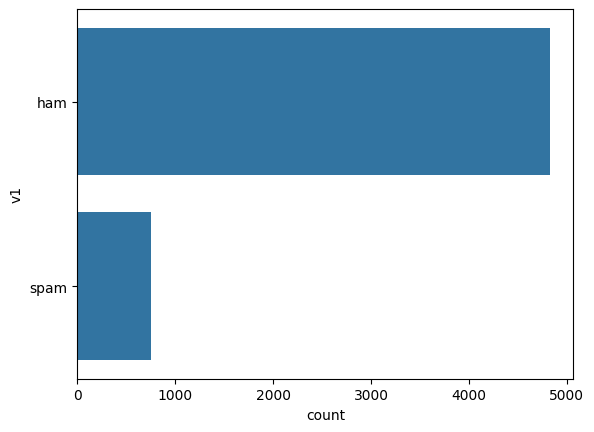

In [ ]:
sns.countplot(df["v1"])

In [ ]:
df["v1"] = df["v1"].map({"spam": 1,"ham" : 0})

In [ ]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Stop words removal
stop_words = set(stopwords.words('english'))

# Lemmatization
lemmatizer = WordNetLemmatizer()

# Tokenization
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]  # Stop words removal and stemming
    return ' '.join(filtered_tokens)

df['v2'] = df['v2'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df

,v1,v2
0,0,"go jurong point , crazy .. available bugis n g..."
1,0,ok lar ... joking wif u oni ...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor ... u c already say ...
4,0,"nah n't think go usf , life around though"
...,...,...
5567,1,2nd time tried 2 contact u. u å£750 pound priz...
5568,0,ì_ b going esplanade fr home ?
5569,0,"pity , * mood . ... suggestion ?"
5570,0,guy bitching acted like 'd interested buying s...


In [ ]:
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return ' '.join(text.split())

df['v2'] = df['v2'].apply(preprocess_text)

In [ ]:
df

,v1,v2
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah nt think go usf life around though
...,...,...
5567,1,nd time tried contact u u pound prize claim ea...
5568,0,b going esplanade fr home
5569,0,pity mood suggestion
5570,0,guy bitching acted like d interested buying so...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
df_new = vectorization.fit_transform(df['v2'])
df_new

<5572x7502 sparse matrix of type '<class 'numpy.float64'>'
	with 45257 stored elements in Compressed Sparse Row format>

In [ ]:

from sklearn.model_selection import train_test_split

X = df_new
y = df["v1"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay


In [ ]:
# Decision Tree Classifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)
dtc_predictions = dtc_model.predict(X_test)

# KNeighbors Classifier
knc_model = KNeighborsClassifier()
knc_model.fit(X_train,y_train)
knc_predictions = knc_model.predict(X_test)

# Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)
rfc_predictions = rfc_model.predict(X_test)

# Ada Boost Classifier
abc_model = AdaBoostClassifier()
abc_model.fit(X_train,y_train)
abc_predictions = abc_model.predict(X_test)

# Logistic Regression (Classifier)
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_predictions = lr_model.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Decision Tree classifier accuracy_score : 0.9650224215246637
Decision Tree classifier confusion_matrix: [[946  19]
 [ 20 130]]
Decision Tree classifier classification_report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98       965
           1       0.87      0.87      0.87       150

    accuracy                           0.97      1115
   macro avg       0.93      0.92      0.92      1115
weighted avg       0.96      0.97      0.96      1115



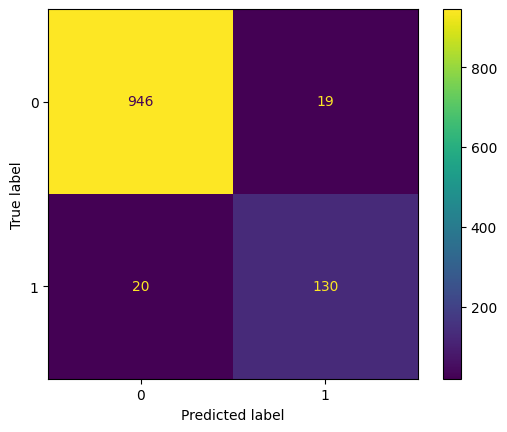

KNeighbors Classifier accuracy_score : 0.9183856502242153
KNeighbors Classifier confusion_matrix : [[965   0]
 [ 91  59]]
KNeighbors Classifier classification_report :               precision    recall  f1-score   support

           0       0.91      1.00      0.95       965
           1       1.00      0.39      0.56       150

    accuracy                           0.92      1115
   macro avg       0.96      0.70      0.76      1115
weighted avg       0.93      0.92      0.90      1115



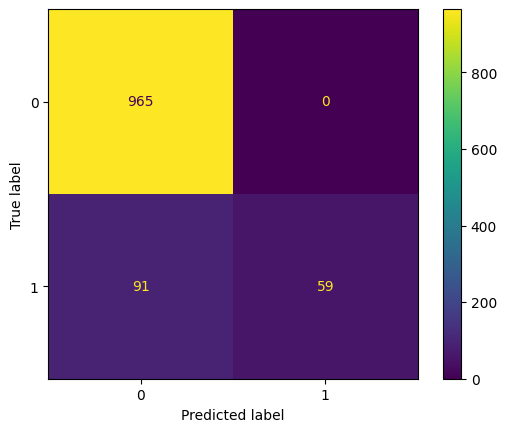

Random Forest accuracy_score: 0.9757847533632287
Random Forest confusion_matrix : [[965   0]
 [ 27 123]]
Random Forest classification_report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



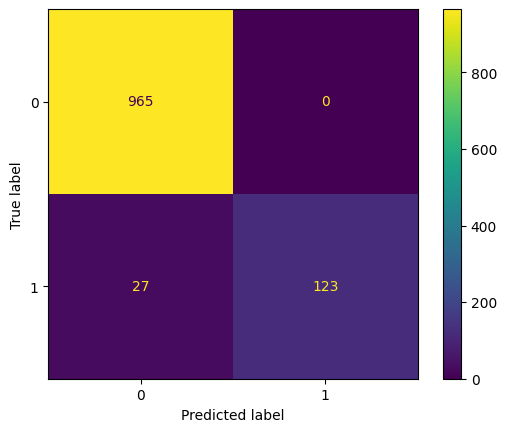

Ada Boost Classifier accuracy_score: 0.9641255605381166
Ada Boost Classifier confusion_matrix: [[961   4]
 [ 36 114]]
Ada Boost Classifier classification_report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.76      0.85       150

    accuracy                           0.96      1115
   macro avg       0.96      0.88      0.92      1115
weighted avg       0.96      0.96      0.96      1115



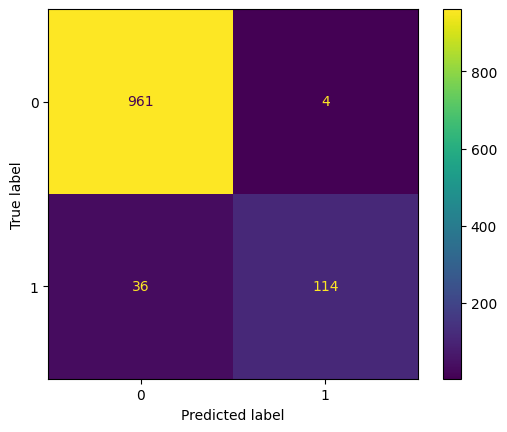

Logistic Regression accuracy_score: 0.947085201793722
Logistic Regression confusion_matrix: [[960   5]
 [ 54  96]]
Logistic Regression classification_report:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       965
           1       0.95      0.64      0.76       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115



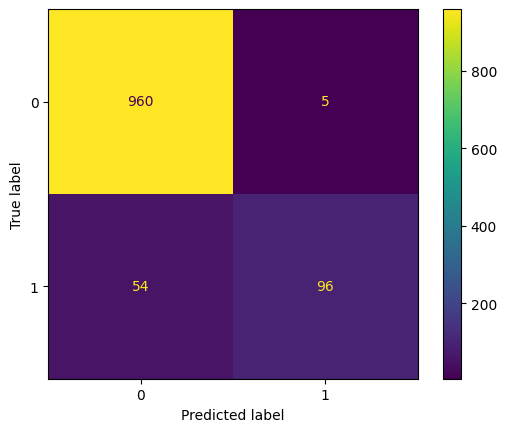

In [ ]:
# Evaluation Metrics
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    return accuracy, cm, cr, disp

# Evaluating Decision Tree Classifier
dtc_accuracy, dtc_cm, dtc_cr, dtc_disp = evaluate(y_test, dtc_predictions)
print("Decision Tree classifier accuracy_score :", dtc_accuracy)
print("Decision Tree classifier confusion_matrix:", dtc_cm)
print("Decision Tree classifier classification_report:", dtc_cr)
dtc_disp.plot()
plt.show()

# Evaluating KNeighbors Classifier
knc_accuracy, knc_cm, knc_cr, knc_disp = evaluate(y_test, knc_predictions)
print("KNeighbors Classifier accuracy_score :", knc_accuracy)
print("KNeighbors Classifier confusion_matrix :", knc_cm)
print("KNeighbors Classifier classification_report :", knc_cr)
knc_disp.plot()
plt.show()

# Evaluating Random Forest Classifier
rfc_accuracy, rfc_cm, rfc_cr, rfc_disp = evaluate(y_test, rfc_predictions)
print("Random Forest accuracy_score:", rfc_accuracy)
print("Random Forest confusion_matrix :", rfc_cm)
print("Random Forest classification_report:", rfc_cr)
rfc_disp.plot()
plt.show()

# Evaluating Ada Boost Classifier
abc_accuracy, abc_cm, abc_cr, abc_disp = evaluate(y_test, abc_predictions)
print("Ada Boost Classifier accuracy_score:", abc_accuracy)
print("Ada Boost Classifier confusion_matrix:", abc_cm)
print("Ada Boost Classifier classification_report:", abc_cr)
abc_disp.plot()
plt.show()

# Evaluating Logistic Regression
lr_accuracy, lr_cm, lr_cr, lr_disp = evaluate(y_test, lr_predictions)
print("Logistic Regression accuracy_score:", lr_accuracy)
print("Logistic Regression confusion_matrix:", lr_cm)
print("Logistic Regression classification_report:", lr_cr)
lr_disp.plot()
plt.show()
